In [ ]:
# 구글 계정 액세스
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.__version__

import matplotlib

In [ ]:
# 이미지 불러오기
import os

path = "/content/drive/MyDrive/Colab/all"
image_list = os.listdir(path)
image_list_png = [image for image in image_list if image.endswith(".png")]

print('image_list_png :{}'.format(image_list_png))

image_list_png :[]


In [ ]:
# 이미지 불러오기
import PIL
import glob

imgs = glob.glob('/content/drive/MyDrive/Colab/all/*.png')

for img in imgs:
    try:
        img = PIL.Image.open(img)
    except PIL.UnidentifiedImageError:
        print(img)

In [ ]:
# 클래스별 갯수 
import os, shutil
original_dataset_dir = '/content/drive/MyDrive/Colab/all/'

folder_list = []
for path_ in os.listdir(original_dataset_dir):
    if path_.startswith('.'):
        pass
    else:
        path2 = original_dataset_dir + path_
        folder_list.append(path_)
        
print(folder_list)

plant_cnt = {}
for path in folder_list:
    plant_cnt[path] = len(os.listdir(original_dataset_dir+path))
    
print(plant_cnt)

['yeoincho', 'geumjeonsoo', 'monstera', 'tableyaja', 'stuckyi']
{'yeoincho': 566, 'geumjeonsoo': 1508, 'monstera': 424, 'tableyaja': 990, 'stuckyi': 362}


In [ ]:
# datasets 파일 만들기
base_dir = '/content/drive/MyDrive/Colab/res50/' 
os.mkdir(base_dir)
# datasets 파일 안에 Plant 파일 만들기
base_dir = '/content/drive/MyDrive/Colab/res50/Plant' # 소규모 데이터셋 저장할 디렉토리
os.mkdir(base_dir)

In [ ]:
# 훈련, 검증, 테스트 폴더 만들기
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(test_dir)

In [ ]:
# 이미지 데이터 이름 변경 (순서매기기)
for path in folder_list:
    i = 1
    for imgPath in os.listdir(original_dataset_dir+path):
        src = os.path.join(original_dataset_dir+path, imgPath)
        dst_ = path + '_' + str(i) + '.png'
        dst = os.path.join(original_dataset_dir+path, dst_)
        
        print(src)
        print(dst)
        print('-' * 40)
        
        os.rename(src, dst)
        i += 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/Colab/all/monstera/monstera_110.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera510.png
/content/drive/MyDrive/Colab/all/monstera/monstera_111.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera530.png
/content/drive/MyDrive/Colab/all/monstera/monstera_112.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera528.png
/content/drive/MyDrive/Colab/all/monstera/monstera_113.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera548.png
/content/drive/MyDrive/Colab/all/monstera/monstera_114.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera544.png
/content/drive/MyDrive/Colab/all/monstera/monstera_115.png
----------------------------------------
/content/drive/MyDrive/Colab/all/monstera/monstera569.png
/content/drive/M

In [ ]:
# 안열리는 파일 삭제 
import PIL, glob
from PIL import Image
from os import remove

datalist = ['train', 'test', 'valid']

for data in datalist : 
    imgs_ = glob.glob(f"/content/drive/MyDrive/Colab/res50/Plant/{data}/*/*.png")

    for img in imgs_:
        try:
            img = PIL.Image.open(img)
        except PIL.UnidentifiedImageError:
            print(img)
            remove(img)

In [ ]:
data_list = [train_dir, valid_dir, test_dir]

for dataset in data_list:
    print('dataset : ',dataset)
    for plant in plant_cnt:
        filePath_ = os.path.join(dataset, plant)
        os.mkdir(filePath_)

        # 데이터 개수의 반틈 train 폴더에 복사
        if dataset == data_list[0]:
            cnt = int(int(plant_cnt[plant])/2)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(0,cnt)]
            print(cnt)
            print(plant,'- train_dir len :', len(fnames))
        
        elif dataset == data_list[1]:
            cnt = int(int(plant_cnt[plant])/2)
            cnt3 = int((int(plant_cnt[plant])/4)*3)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt,cnt3)]
            print(plant,'- valid_dir len :', len(fnames))
            print("fnames : ",fnames)
        else :
            cnt3 = int((int(plant_cnt[plant])/4)*3)
            fnames = ['{}_{}.png'.format(plant, i+1) for i in range(cnt3,plant_cnt[plant])]
            print(plant, '-test_dir len :', len(fnames))
            
        for fname in fnames:
            src = os.path.join(original_dataset_dir,plant)
            src2 = os.path.join(src,fname)
            dst = os.path.join(filePath_,fname)
#             print(src2)
            print('dst :',dst)
            shutil.copyfile(src2,dst)

dataset :  /content/drive/MyDrive/Colab/res50/Plant/train
283
yeoincho - train_dir len : 283
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_1.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_2.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_3.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_4.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_5.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_6.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_7.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_8.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_9.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_10.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoincho/yeoincho_11.png
dst : /content/drive/MyDrive/Colab/res50/Plant/train/yeoin

In [ ]:
for plant in plant_cnt:
    path_train = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train',plant)
    print(plant)
    print('훈련용 이미지 개수 : ', len(os.listdir(path_train)))

    path_valid = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid',plant)
    print('valid 이미지 개수 : ', len(os.listdir(path_valid)))

    path_test = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test',plant)
    print('test 이미지 개수 : ', len(os.listdir(path_test)))
    print('-' * 40)    

yeoincho
훈련용 이미지 개수 :  283
valid 이미지 개수 :  141
test 이미지 개수 :  142
----------------------------------------
geumjeonsoo
훈련용 이미지 개수 :  754
valid 이미지 개수 :  377
test 이미지 개수 :  377
----------------------------------------
monstera
훈련용 이미지 개수 :  212
valid 이미지 개수 :  106
test 이미지 개수 :  106
----------------------------------------
tableyaja
훈련용 이미지 개수 :  495
valid 이미지 개수 :  247
test 이미지 개수 :  248
----------------------------------------
stuckyi
훈련용 이미지 개수 :  181
valid 이미지 개수 :  90
test 이미지 개수 :  91
----------------------------------------


In [ ]:
# 모델 구성
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers

from tensorflow.keras import Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import scipy
import matplotlib.pyplot as plt

In [ ]:
# ResNet50 model 불러오기 
base_model = ResNet50(include_top=False, input_shape =(150,150, 3), weights = 'imagenet')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
# ResNet50 전이학습 
base_model.trainable = False

## 모델 layer 설계
inputs = Input(shape=(150,150, 3))
x = tf.keras.layers.experimental.preprocessing.Resizing(150,150)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training = False)
x = Flatten()(x)   # Fully Connected에 온전하게 학습을 위해 펼쳐준다 

# x = Dense(256, activation = 'relu')(x)
outputs = Dense(5, activation = 'softmax')(x) # Softmax 함수로 5개 분류

model_res = tf.keras.Model(inputs, outputs) # model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성

In [ ]:
# 모델 확인
model_res.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 150, 150, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2560

In [ ]:
model_res.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),  # RMSprop : 기울기를 단순 누적하지 않고 지수 가중 이동 평균 Exponentially weighted moving average 를 사용하여 최신 기울기들이 더 크게 반영되도록 하였다
             metrics = ['acc'])

In [ ]:
# 모든 이미지를 1/255로 스케일을 조정
train_datagan = ImageDataGenerator(rescale=1./255)
test_datagan = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagan.flow_from_directory(
                                            train_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 1925 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagan.flow_from_directory(
                                            valid_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 961 images belonging to 5 classes.


In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 
history = model_res.fit(train_generator,
                    validation_data=validation_generator,
                    # callbacks=[early],
                    epochs=5)


Epoch 1/5
81/81 [==============================] - 279s 3s/step - loss: 6.9998 - acc: 0.4592 - val_loss: 1.6523 - val_acc: 0.6212
Epoch 2/5
81/81 [==============================] - 224s 3s/step - loss: 1.8731 - acc: 0.6234 - val_loss: 5.1893 - val_acc: 0.4662
Epoch 3/5
81/81 [==============================] - 224s 3s/step - loss: 1.8660 - acc: 0.6499 - val_loss: 2.0297 - val_acc: 0.6285
Epoch 4/5
81/81 [==============================] - 224s 3s/step - loss: 1.3413 - acc: 0.7060 - val_loss: 2.3365 - val_acc: 0.5286
Epoch 5/5
81/81 [==============================] - 223s 3s/step - loss: 1.4246 - acc: 0.7200 - val_loss: 2.1191 - val_acc: 0.6618


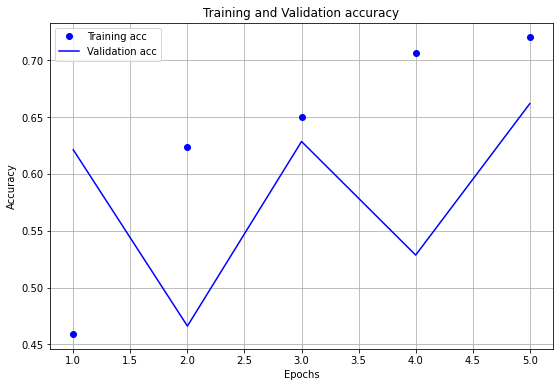

In [ ]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
# # torch 모델 저장
# import torch
# def save_model(model, saved_dir):
#   os.makedirs(saved_dir, exist_ok=True) # 폴더가 존재하지 않으면 디렉토리를 생성함
#   check_point = {
#       # 'net' : model.state_dict()
#       # 'optim' : optimizer.state_dict()
#       # 'loss' : loss.state_dict()
#       # 'epoch' : epoch.state_dict()
#   }
#   torch.save(check_point, saved_dir+'/resnet50.pt')

In [ ]:
# 모델 저장
# import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2

# model_type = 'resnet50'

saved_model_dir = '/content/drive/MyDrive/Colab/resnet50_saved_model'

model_res.save(saved_model_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/resnet50_saved_model/assets


In [ ]:
# 코랩 껐다 켰을 때
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers

from tensorflow.keras import Input
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import scipy
import matplotlib.pyplot as plt

In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Colab/resnet50_saved_model'
model_res1 = load_model(model_path, compile=True)

model_res1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 150, 150, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2560

In [ ]:
# 저장된 모델만 불러온 후 학습, 검증, 테스트셋과 연결
import PIL
import glob
import os, shutil


train_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train')
valid_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid')
test_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test')

In [ ]:
# 모든 이미지를 1/255로 스케일을 조정
train_datagan = ImageDataGenerator(rescale=1./255)
test_datagan = ImageDataGenerator(rescale=1./255)

In [ ]:
# train_generator : 모델 증식
train_generator = train_datagan.flow_from_directory(
                                            train_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 1925 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagan.flow_from_directory(
                                            valid_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 961 images belonging to 5 classes.


In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 
history = model_res1.fit(train_generator,
                    validation_data=validation_generator,
                    # callbacks=[early],
                    epochs=30)


Epoch 1/30
81/81 [==============================] - 202s 2s/step - loss: 1.6240 - acc: 0.7366 - val_loss: 3.1866 - val_acc: 0.5598
Epoch 2/30
81/81 [==============================] - 201s 2s/step - loss: 2.5591 - acc: 0.7273 - val_loss: 2.3282 - val_acc: 0.6472
Epoch 3/30
81/81 [==============================] - 201s 2s/step - loss: 2.2789 - acc: 0.7262 - val_loss: 3.1504 - val_acc: 0.6639
Epoch 4/30
81/81 [==============================] - 201s 2s/step - loss: 1.6530 - acc: 0.7662 - val_loss: 4.9504 - val_acc: 0.6348
Epoch 5/30
81/81 [==============================] - 201s 2s/step - loss: 0.9727 - acc: 0.8182 - val_loss: 3.9492 - val_acc: 0.6108
Epoch 6/30
81/81 [==============================] - 203s 3s/step - loss: 1.5091 - acc: 0.7709 - val_loss: 4.1737 - val_acc: 0.6171
Epoch 7/30
81/81 [==============================] - 204s 3s/step - loss: 1.8913 - acc: 0.7512 - val_loss: 3.8254 - val_acc: 0.6171
Epoch 8/30
81/81 [==============================] - 203s 3s/step - loss: 1.1563 - a

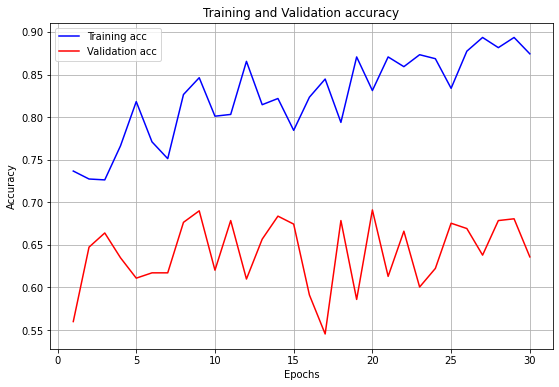

In [ ]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
# 모델 테스트
test_generator = test_data.flow_from_directory(test_dir, target_size=(150, 150), batch_size=24, class_mode='categorical')
test_loss, test_acc = model_res1.evaluate_generator(test_generator, steps=30)
print(f'test loss: {test_loss}, test acc: {test_acc}')

Found 964 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test loss: 5.4622883796691895, test acc: 0.5916666388511658


In [ ]:
# 모델 저장
# import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2

# model_type = 'resnet50'

saved_model_dir = '/content/drive/MyDrive/Colab/resnet50_saved_model1'

model_res1.save(saved_model_dir)

# 결과 test loss: 5.4622883796691895, test acc: 0.5916666388511658

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/resnet50_saved_model1/assets


In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Colab/resnet50_saved_model1'
model_res2 = load_model(model_path, compile=True)

model_res2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 150, 150, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2560

In [ ]:
# 저장된 모델만 불러온 후 학습, 검증, 테스트셋과 연결
import PIL
import glob
import os, shutil


train_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/train')
valid_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/valid')
test_dir = os.path.join('/content/drive/MyDrive/Colab/res50/Plant/test')

In [ ]:
# 모든 이미지를 1/255로 스케일을 조정
train_datagan = ImageDataGenerator(rescale=1./255)
test_datagan = ImageDataGenerator(rescale=1./255)

In [ ]:
# train_generator : 모델 증식
train_generator = train_datagan.flow_from_directory(
                                            train_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 1925 images belonging to 5 classes.


In [ ]:
validation_generator = test_datagan.flow_from_directory(
                                            valid_dir, 
                                            target_size = (150,150),
                                            batch_size=24,
                                            class_mode='categorical')

Found 961 images belonging to 5 classes.


In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습 
history = model_res2.fit(train_generator,
                    validation_data=validation_generator,
                    # callbacks=[early],
                    epochs=50)


Epoch 1/50
81/81 [==============================] - 601s 7s/step - loss: 1.4771 - acc: 0.8312 - val_loss: 6.6352 - val_acc: 0.6254
Epoch 2/50
81/81 [==============================] - 14s 171ms/step - loss: 0.7232 - acc: 0.8899 - val_loss: 4.1399 - val_acc: 0.6691
Epoch 3/50
81/81 [==============================] - 14s 169ms/step - loss: 0.4756 - acc: 0.9091 - val_loss: 5.7625 - val_acc: 0.6368
Epoch 4/50
81/81 [==============================] - 14s 167ms/step - loss: 0.8011 - acc: 0.8701 - val_loss: 6.7132 - val_acc: 0.6566
Epoch 5/50
81/81 [==============================] - 14s 167ms/step - loss: 0.9794 - acc: 0.8655 - val_loss: 8.8110 - val_acc: 0.5390
Epoch 6/50
81/81 [==============================] - 14s 167ms/step - loss: 1.4090 - acc: 0.8488 - val_loss: 7.7060 - val_acc: 0.6597
Epoch 7/50
81/81 [==============================] - 14s 167ms/step - loss: 1.6710 - acc: 0.8317 - val_loss: 8.7348 - val_acc: 0.6379
Epoch 8/50
81/81 [==============================] - 13s 165ms/step - lo

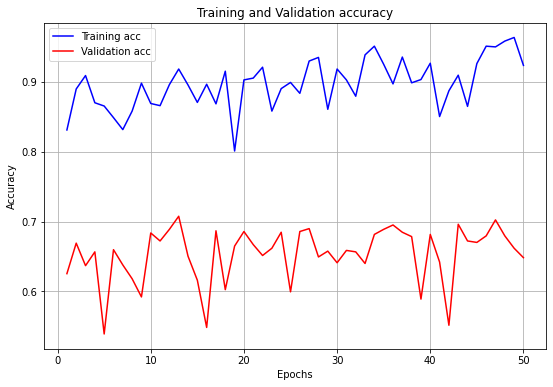

In [ ]:
# 모델 과적합 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
# 모델 테스트
test_generator = test_data.flow_from_directory(test_dir, target_size=(150, 150), batch_size=24, class_mode='categorical')
test_loss, test_acc = model_res2.evaluate_generator(test_generator, steps=50)
print(f'test loss: {test_loss}, test acc: {test_acc}')

Found 964 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test loss: 13.15320873260498, test acc: 0.5705394148826599


In [ ]:
# 모델 저장
# import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2

# model_type = 'resnet50'

saved_model_dir = '/content/drive/MyDrive/Colab/resnet50_saved_model2'

model_res2.save(saved_model_dir)

# test loss: 13.15320873260498, test acc: 0.5705394148826599

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/resnet50_saved_model2/assets
